# TimeSeries

Objetivo é observar possiveis modelos de series temporais, com uma base de dados simples e posteriomente escolher um dos modelos e realizar previsôes futuras.

In [ ]:
# Importando as depêndencias

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Exercícios/shampoo.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


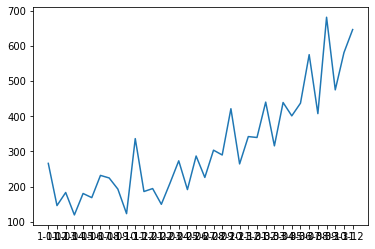

In [ ]:
# Visualizando a serie
plt.plot(df.Month, df.Sales)

In [ ]:
# Importando o Arima 

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p, 0, 0])
    model_fit = model.fit()
    return model_fit

In [ ]:
data = df.Sales

## Modelos AR

In [ ]:
AR_1 = AR_model_generation(data, 1)
AR_2 =  AR_model_generation(data, 2)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Sun, 19 Mar 2023   AIC                            442.157
Time:                        23:57:35   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2373     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.000    4985.064    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.54   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.28
Heteroskedasticity (H):               2.16   Skew:                             0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Pesquisei sobre as informações que vem na função summary()

- Dep. Variável: nome da variável dependente
- No. Observações: número de observações na amo
- Modelo: especificação do modelo ajustado, incluindo os parâmetros ARIMA e sazonais (SARIMA) 
- Log Likelihood: logaritmo da verossimilhança do modelo ajustado
- AIC: Critério de Informação de Akaike, uma medida de ajuste que penaliza modelos mais complexos
- BIC: Critério de Informação Bayesiano, outra medida de ajuste que penaliza modelos mais complexos
- Sample: período da amostra (a partir de qual observação o modelo foi ajustado)
- HQIC: Critério de Informação Hannan-Quinn, outra medida de ajuste que penaliza modelos mais complexos
- Covariance Type: tipo de covariância usada para estimar os erros padrão dos parâmetros
- coef: coeficientes estimados para os parâmetros do modelo
- std err: erro padrão dos coeficientes estimados
- z: estatística de teste para testar a hipótese nula de que o coeficiente é igual a zero
-Ljung-Box (L1) (Q): estatística de teste de Ljung-Box para testar a hipótese nula de independência dos resíduos (no intervalo de defasagem 1)
-Jarque-Bera (JB): estatística de teste de Jarque-Bera para testar a hipótese nula de normalidade dos resíduos
- Prob(Q): valor-p para o teste de Ljung-Box
- Prob(JB): valor-p para o teste de Jarque-Bera
- Heteroskedasticity (H): estatística de teste para testar a hipótese nula de homocedasticidade dos resíduos

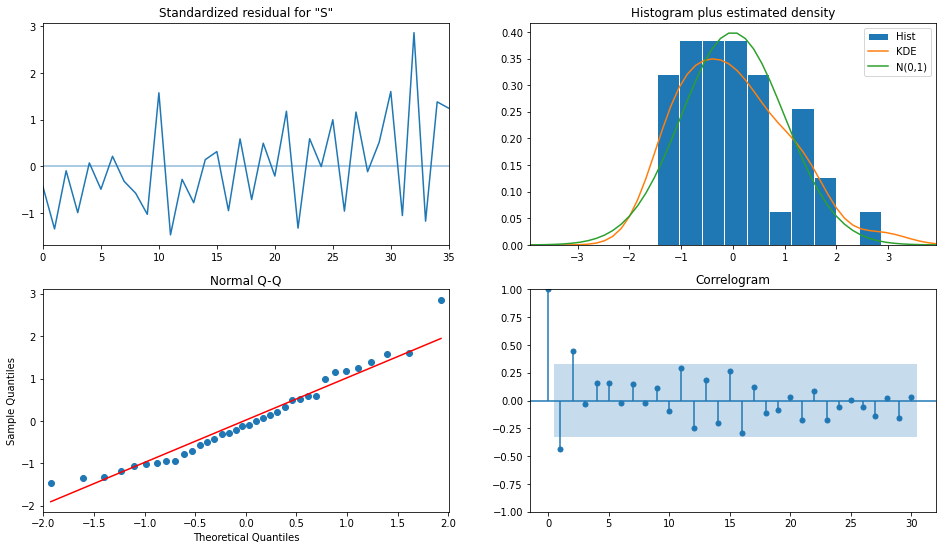

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

- Analisando o que o sumário retorna:
  -  O modelo também apresenta um bom ajuste aos dados, indicado pela significância estatística dos parâmetros, baixo valor do critério de informação AIC e BIC e pelos testes de diagnóstico de resíduos (Ljung-Box e Jarque-Bera). Além disso, a série apresenta heteroscedasticidade moderada (H = 2,16) e inclinação positiva (0,65), o que sugere a possibilidade de explorar a modelagem de outras variáveis explicativas que possam ajudar a explicar a variação da série ao longo do tempo.

O modelo AR demontrou no correlograma que tem algum padrão dos dados que o modelo não está considerando. Sendo assim vou analisar como os modelos MA se comportam

## Modelos MA

In [ ]:
def MA_model_generation(ts, q):
    model = ARIMA(ts, order = [0, 0, q])
    model_fit = model.fit()
    return model_fit

In [ ]:
MA_1 = MA_model_generation(data, 1)
MA_2 = MA_model_generation(data, 2)

In [ ]:
MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -225.589
Date:                Mon, 20 Mar 2023   AIC                            457.179
Time:                        00:00:56   BIC                            461.929
Sample:                             0   HQIC                           458.837
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.3672     38.210      8.201      0.000     238.478     388.257
ma.L1          0.4004      0.162      2.468      0.014       0.082       0.718
sigma2      1.615e+04   4441.939      3.636      0.000    7444.771    2.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.14   Prob(JB):                         0.06
Heteroskedasticity (H):               2.41   Skew:                             0.95
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

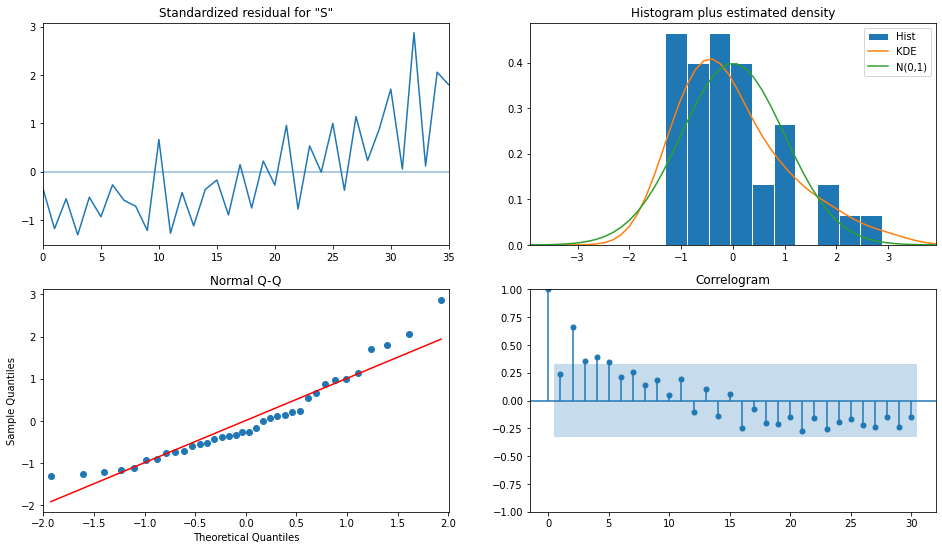

In [ ]:
fig_1 = plt.figure(figsize=(16,9))
fig_1 = MA_1.plot_diagnostics(fig=fig_1, lags=30)

- pode-se dizer que a série de vendas apresenta um comportamento sazonal significativo e uma tendência estável ao longo do tempo. O modelo SARIMAX(0,0,1) foi considerado o melhor ajuste para os dados, com um coeficiente significativo para o termo de média móvel (MA), indicando que o modelo foi capaz de capturar as flutuações aleatórias na série. Além disso, a presença de heteroscedasticidade indica que a variância dos erros de previsão não é constante ao longo do tempo, o que pode ser considerado na avaliação e interpretação das previsões. No entanto, é importante ter em mente que essas análises são baseadas em uma modelagem estatística e que a interpretação dos resultados deve ser feita com cautela e levando em conta o contexto e conhecimento prévio do problema em questão.

## ARMA

In [ ]:
def ARMA_model_generation(ts, p, q):
    model = ARIMA(ts, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

In [ ]:
ARMA_1_1 = ARMA_model_generation(data, 1, 1)
ARMA_2_2 = ARMA_model_generation(data, 2, 2)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


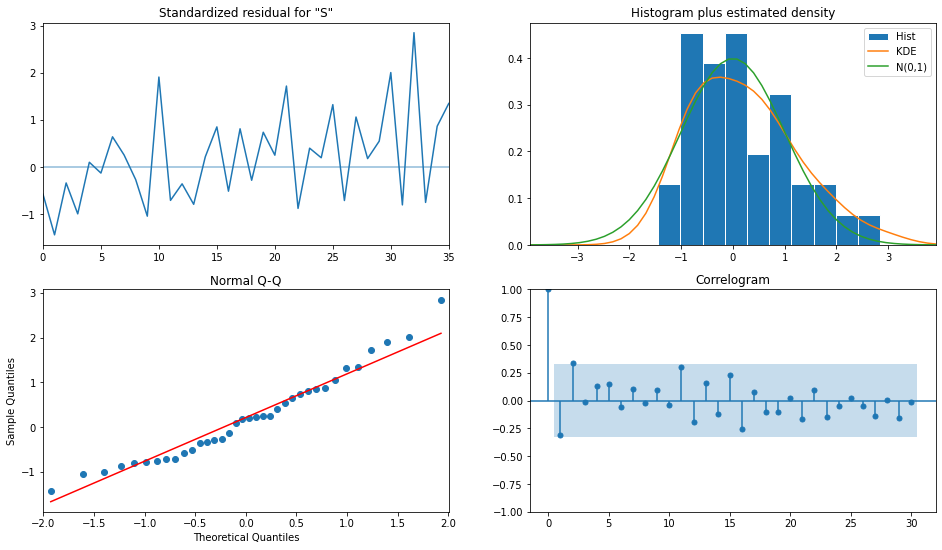

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_1_1.plot_diagnostics(fig=fig, lags=30)

In [ ]:
ARMA_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Mon, 20 Mar 2023   AIC                            430.108
Time:                        00:25:25   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7011    234.967      1.586      0.113     -87.826     833.229
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.007      -1.011      -0.160
sigma2      6857.3427   1720.648      3.985      0.000    3484.936    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.06   Prob(JB):                         0.30
Heteroskedasticity (H):               2.11   Skew:                             0.63
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMA

- Esse modelo é um ARIMA(1,0,1) aplicado em uma série de vendas com 36 observações. O modelo mostra que a constante tem um valor de 372.7011 com um erro padrão de 234.967, e o coeficiente autorregressivo (AR) é de 0.9802 com um erro padrão de 0.044. O coeficiente de média móvel (MA) é -0.5855 com um erro padrão de 0.217. O modelo apresentou um bom ajuste aos dados, pois o valor do Log Likelihood é -211.054 e o AIC é 430.108, ambos indicando um bom ajuste. Além disso, o valor p do teste de Ljung-Box (L1) é 0.06, o que sugere que o modelo não tem autocorrelação serial significativa, e o valor p do teste de Jarque-Bera (JB) é 0.30, sugerindo que os resíduos não são significativamente não normais. A série apresenta uma leve heterocedasticidade, com um valor de H de 2.11, mas isso não afeta muito a qualidade do modelo

In [ ]:
# Verificando se um modelo SARIMA tem boa perfromance
import statsmodels.api as sm

# ajusta o modelo SARIMA
model = sm.tsa.SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# faz a previsão para os próximos 12 meses
forecast = result.get_forecast(steps=12)

# extrai as previsões e os intervalos de confiança
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


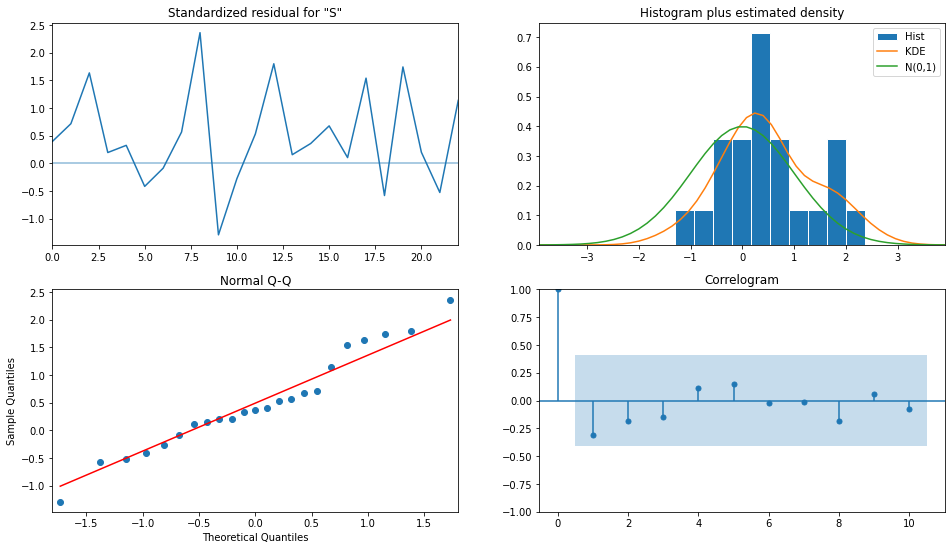

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = result.plot_diagnostics(fig=fig)

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -138.544
Date:                            Mon, 20 Mar 2023   AIC                            287.088
Time:                                    00:33:17   BIC                            292.766
Sample:                                         0   HQIC                           288.516
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5911      0.505     -1.170      0.242      -1.581       0.399
ma.L1         -0.5244      0.378     -1.389      0.165      -1.265       0.216
ar.S.L12      -0.9983      0.063    -15.828      0.000      -1.122      -0.875
ma.S.L12       0.9394      1.138      0.826      0.409      -1.291       3.170
sigma2      5600.0257      0.000   2.55e+07      0.000    5600.025    5600.026
===================================================================================
Ljung-Box (L1) (Q):                   2.47   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.12   Prob(JB):                         0.81
Heteroskedasticity (H):               1.96   Skew:                             0.28
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+23. Standard errors may be unstable.
"""

# Testando previsões com o AR

##  Testando o ARIMA, como estou utizando o modelo Arima como adaptações para o AR, MA, ARIMA como o modelo realizaria prediçoes?

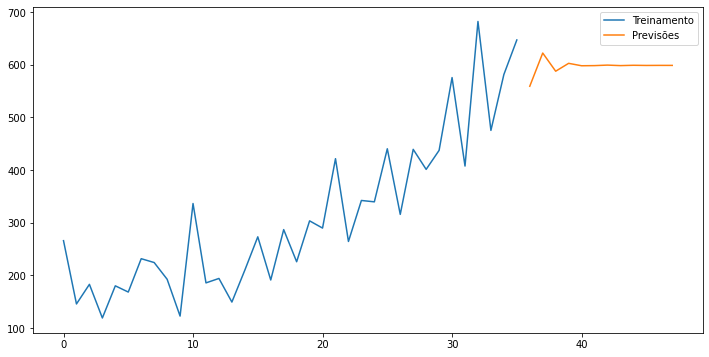

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Criando o modelo ARMA
modelo_arima = sm.tsa.ARIMA(df['Sales'], order=(2,1,0))
resultado = modelo_arima.fit() 

# Fazendo previsões
predicoes = resultado.predict(start=len(df), end=len(df)+11, dynamic=False)

# Plotando os dados de treinamento, teste e previsões
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label='Treinamento')
plt.plot(predicoes.index, predicoes, label='Previsões')
plt.legend()
plt.show()



## O modelo inicialmente demosntrou um comportamento similar a serie mas depois ficou constante, pode ser uma amostra que não seria um bom modelo

__...Seguimos a análise__

In [ ]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


## Utilizando o prophet

In [ ]:
!sudo pip install pystan==2.19.1.1 prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 9.8 MB/s eta 0:00:00
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826114 sha256=f73ace4b83e2aa0990a536d30eeb170db96f6ba105f30921cdda07851160adb9
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from prophet import Prophet


<Axes: >

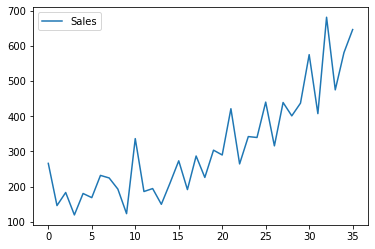

In [ ]:
df.plot()

In [ ]:
data = df.rename(columns = {"Month": "ds", "Sales": "y"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      36 non-null     object 
 1   y       36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
# converter coluna 'data' para objeto de data
data['ds'] = pd.to_datetime('2022-' + data['ds'], format='%Y-%d-%m')



- O Prophet é projetado para trabalhar com dados que possuem uma estrutura temporal completa, que inclui informações de ano, mês, dia, hora e minuto. Isso ocorre porque o modelo faz uso dessas informações para construir as sazonalidades, tendências e padrões que são necessários para as previsões.

In [ ]:
#data['ds'] = data['ds'].apply(lambda x: x.strftime('%d/%m'))

In [ ]:
data.head()

,ds,y
0,2022-01-01,266.0
1,2022-02-01,145.9
2,2022-03-01,183.1
3,2022-04-01,119.3
4,2022-05-01,180.3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpspzpg8w9/092ykz5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpspzpg8w9/ifilf09v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50676', 'data', 'file=/tmp/tmpspzpg8w9/092ykz5n.json', 'init=/tmp/tmpspzpg8w9/ifilf09v.json', 'output', 'file=/tmp/tmpspzpg8w9/prophet_modeljsh70_bq/prophet_model-20230320015304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:53:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


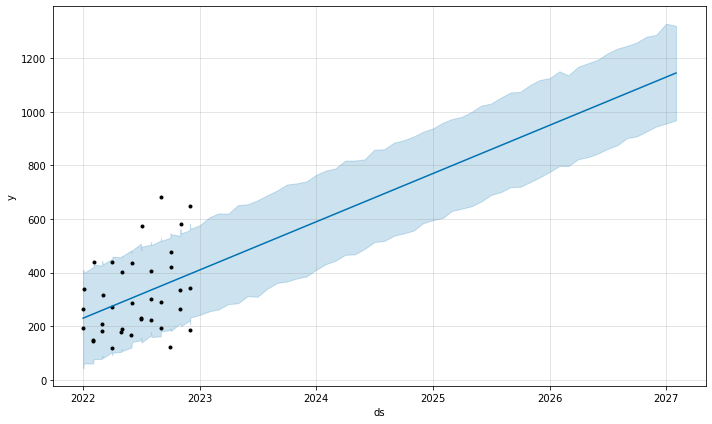

In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpspzpg8w9/mq2uyp1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpspzpg8w9/9vl5jhpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48314', 'data', 'file=/tmp/tmpspzpg8w9/mq2uyp1h.json', 'init=/tmp/tmpspzpg8w9/9vl5jhpg.json', 'output', 'file=/tmp/tmpspzpg8w9/prophet_modelqjv9t6kc/prophet_model-20230320015352.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


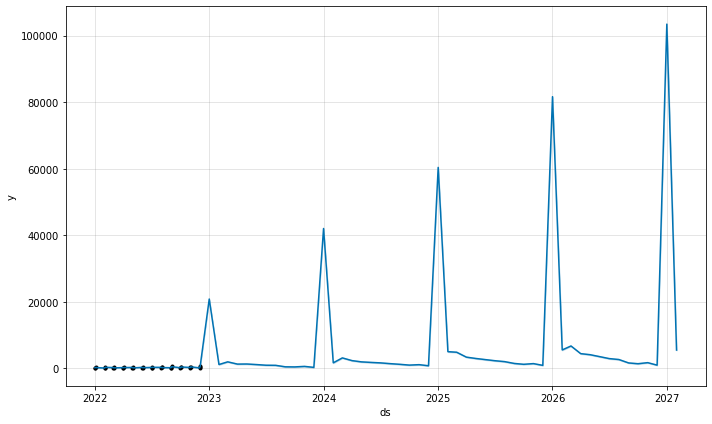

In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=True,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

## Como visualizamos acima o modelo prophet não se comporta sem a informação de ano, e ao escolher um ano base também não teve boa visualização

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Exercícios/shampoo.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fai

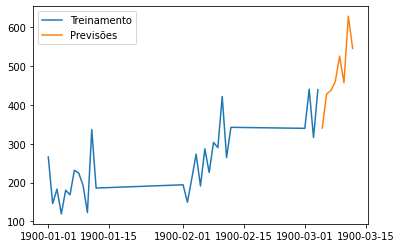

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Transformar a coluna de data em datetime
df['Month'] = pd.to_datetime(df['Month'], format='%m-%d')

# Definir a coluna de data como índice do DataFrame
df = df.set_index('Month')

# Separar os dados em treinamento e teste (80% para treinamento, 20% para teste)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Treinar o modelo SARIMA
model = sm.tsa.SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Fazer previsões para o conjunto de teste
predictions = result.predict(start=len(train), end=len(df)-1, dynamic=False)

# Plotar os resultados
plt.plot(train['Sales'], label='Treinamento')
plt.plot(predictions, label='Previsões')
plt.legend()
plt.show()


## Conclusões

- A análise sobre series temporais demonstra que o contexto diz muito sobre a abordagem que devemos ter sobre a serie temporal, o modelo em questão tem uma base de dados bem enxuta e com isso não achei que seria uma boa alternativa utilizar de RNNs, o modelo não conseguiria aprender com poucos dados, sobre os dados que verifiquei analisei que o melhor modelo foi o SARIMA por acreditar que teria boa performance em uma base de dados com informação de mes e dia, diferentemente do prophet e do AR e MA, visto que visualizei sazonalidade e ao realizar a previsão foi o modelo que mais fez sentido para mim.